# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pprint

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df = pd.read_csv("../Automatidata_Tableau_dataset.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,4.5,0.0,0.5,1.05,0.0,0.3,6.35,0 days 00:04:19,4.32,4.32
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,0 days 00:05:31,5.52,5.52
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,12.5,0.0,0.5,0.00,0.0,0.3,13.30,0 days 00:18:05,18.08,18.08
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,8.5,0.0,0.5,0.00,0.0,0.3,9.30,0 days 00:10:51,10.85,10.85
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,17.0,0.5,0.5,2.00,0.0,0.3,20.30,0 days 00:16:25,16.42,16.42


## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


- To get a feel of data and some properties of the variables.
- To spot any errors in the dataset.
- To explore the relationships between various varibles.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [3]:
print(df.shape)

# Keep `df0` as the original dataframe and create a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df0 = df.copy()

# Display basic info about the dataset
df.info()

(50000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        50000 non-null  int64  
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             50000 non-null  int64  
 6   store_and_fwd_flag     50000 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  int64  
 10  fare_amount            50000 non-null  float64
 11  extra                  50000 non-null  float64
 12  mta_tax                50000 non-null  float64
 13  tip_amount             50000 non-null  float64
 14  tolls_amount           50000 non-null  flo

In [95]:
# Check for duplicates
print('Shape of dataframe:', df0.shape)
print('Shape of dataframe with duplicates dropped:', df0.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df0.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df0.isna().sum()

Shape of dataframe: (50000, 20)
Shape of dataframe with duplicates dropped: (50000, 20)
Total count of missing values: 0
Missing values per column:


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
dur_mins                 0
abs_mins                 0
dtype: int64

In [21]:
# Use .describe()
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dur_mins,abs_mins
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.547080,1.637240,2.869937,1.032020,163.923220,161.133020,1.346860,12.191566,0.316560,0.498240,1.703802,0.277595,0.299772,15.292287,13.311213,37.933310
std,0.497784,1.273467,3.680610,0.233572,66.568002,71.121438,0.492659,10.463904,0.440572,0.032356,2.548731,1.349156,0.011539,12.999281,167.417390,163.605653
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-10.000000,-0.500000,-0.500000,0.000000,0.000000,-0.300000,-10.300000,-719.130000,0.000000
25%,1.000000,1.000000,0.970000,1.000000,114.000000,107.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,5.970000,6.230000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.000000,0.500000,1.250000,0.000000,0.300000,11.160000,10.000000,10.320000
75%,2.000000,2.000000,2.990000,1.000000,233.000000,234.000000,2.000000,13.500000,0.500000,0.500000,2.250000,0.000000,0.300000,16.560000,16.330000,17.030000
max,2.000000,8.000000,57.600000,5.000000,265.000000,265.000000,4.000000,170.000000,4.500000,0.500000,258.000000,28.580000,0.300000,349.300000,2129.780000,2129.780000


### Task 2b. Convert pickup & dropoff columns to datetime


In [22]:
# Check the format of the data
print(type(df.loc[1, 'tpep_dropoff_datetime']), "\n", type(df.loc[1, 'tpep_pickup_datetime']))

<class 'str'> 
 <class 'str'>


In [23]:
# Convert datetime columns to datetime

# Convert `tpep_pickup_datetime` to datetime format
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime, infer_datetime_format=True)

# Convert `tpep_dropoff_datetime` to datetime format
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime, infer_datetime_format=True)

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print(type(df.loc[1, 'tpep_dropoff_datetime']), "\n", type(df.loc[1, 'tpep_pickup_datetime']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 
 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [27]:
df['tpep_dropoff_datetime']

0       2017-01-10 01:44:41
1       2017-01-09 08:59:45
2       2017-01-07 08:15:04
3       2017-01-15 12:34:15
4       2017-01-20 02:09:57
                ...        
49995   2017-01-18 08:38:09
49996   2017-01-17 11:43:47
49997   2017-01-15 02:06:56
49998   2017-01-09 11:26:50
49999   2017-01-06 02:41:41
Name: tpep_dropoff_datetime, Length: 50000, dtype: datetime64[ns]

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [29]:
# Create `duration` column
df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime) / np.timedelta64(1, 'm')
df['duration']

0         4.316667
1         5.516667
2        18.083333
3        10.850000
4        16.416667
           ...    
49995     3.383333
49996     7.666667
49997     3.733333
49998    15.916667
49999    13.983333
Name: duration, Length: 50000, dtype: float64

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               50000 non-null  int64         
 1   tpep_pickup_datetime   50000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  50000 non-null  datetime64[ns]
 3   passenger_count        50000 non-null  int64         
 4   trip_distance          50000 non-null  float64       
 5   RatecodeID             50000 non-null  int64         
 6   store_and_fwd_flag     50000 non-null  object        
 7   PULocationID           50000 non-null  int64         
 8   DOLocationID           50000 non-null  int64         
 9   payment_type           50000 non-null  int64         
 10  fare_amount            50000 non-null  float64       
 11  extra                  50000 non-null  float64       
 12  mta_tax                50000 non-null  float64       
 13  t

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

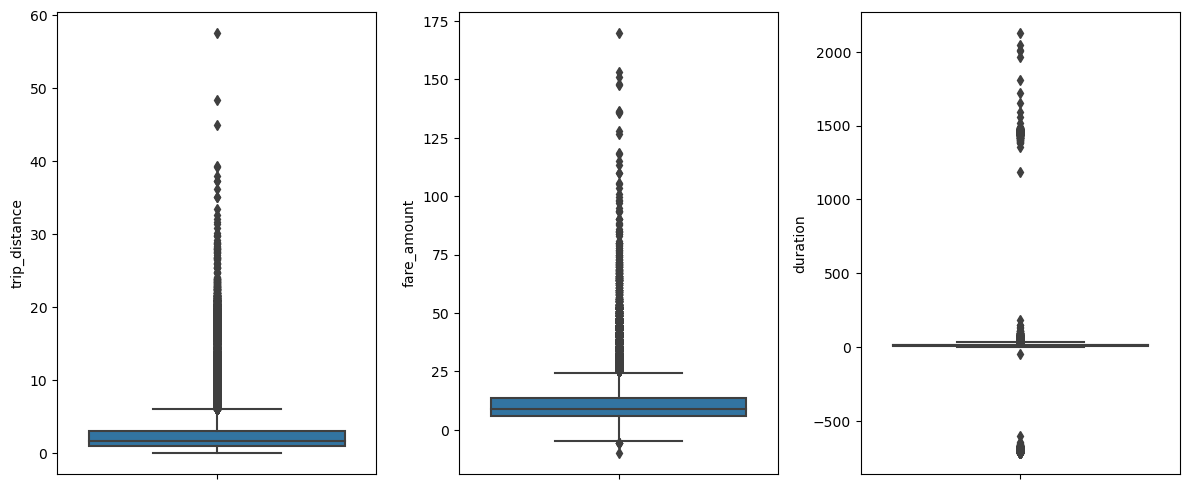

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(y=df.trip_distance, ax=ax[0], )
sns.boxplot(y=df.fare_amount, ax=ax[1])
sns.boxplot(y=df.duration, ax=ax[2])

fig.tight_layout()

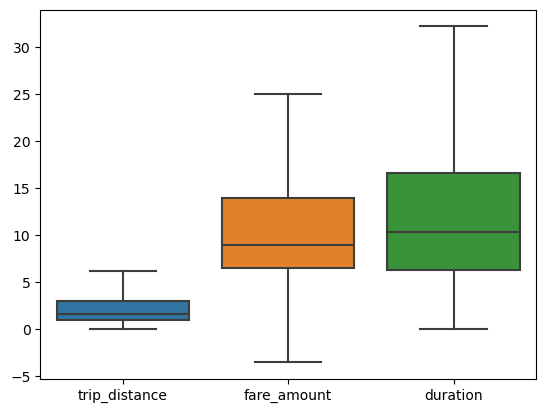

In [16]:
sns.boxplot(df[['trip_distance', 'fare_amount', 'duration']], showfliers = False);

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

**Ans.**
1. All Variables contain outliers.
2. Yes some rides have really low distance ~= 0 which don't make sense.
3. No negative fares and durations don't make any sense.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [46]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df.trip_distance))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [47]:
(df.trip_distance == 0).sum()

2

In [48]:
2/50000*100

0.004

Since the count of 0 distances is minute (0.004%), we can drop these values.

#### `fare_amount` outliers

In [49]:
df.fare_amount.describe()

count    50000.000000
mean        12.191566
std         10.463904
min        -10.000000
25%          6.000000
50%          9.000000
75%         13.500000
max        170.000000
Name: fare_amount, dtype: float64

In [54]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins,duration
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,...,0.0,0.5,1.05,0.0,0.3,6.35,0 days 00:04:19,4.32,4.32,4.316667
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,...,0.5,0.5,1.80,0.0,0.3,9.10,0 days 00:05:31,5.52,5.52,5.516667
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,...,0.0,0.5,0.00,0.0,0.3,13.30,0 days 00:18:05,18.08,18.08,18.083333
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,...,0.0,0.5,0.00,0.0,0.3,9.30,0 days 00:10:51,10.85,10.85,10.850000
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,...,0.5,0.5,2.00,0.0,0.3,20.30,0 days 00:16:25,16.42,16.42,16.416667


In [50]:
df[df.fare_amount == max(df.fare_amount)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins,duration
37481,2,2017-01-03 10:50:57,2017-01-03 11:26:01,2,27.91,5,N,93,265,1,...,0.0,0.5,10.0,0.0,0.3,180.8,0 days 00:35:04,35.07,35.07,35.066667


In [53]:
q1, q3 = np.percentile(df.fare_amount, [25, 75])
q3 + 1.5*(q3-q1)

24.75

**Question:** What do you notice about the values in the `fare_amount` column?

- Negative values in fare_amount are suspisious.

Impute values less than $0 with `0`.

In [55]:
print((df.fare_amount < 0).sum())
df.loc[df.fare_amount < 0, 'fare_amount'] = 0

18


In [56]:
upper_thresh = q3 + 6*(q3-q1)
print(set(df0.loc[df0.fare_amount > upper_thresh, 'fare_amount']))

{59.0, 60.0, 60.5, 60.8, 62.5, 62.0, 59.5, 63.0, 61.0, 63.5, 64.5, 65.0, 66.5, 67.5, 68.5, 69.0, 71.0, 72.0, 70.0, 78.0, 78.5, 79.0, 74.5, 77.0, 83.0, 79.5, 80.0, 81.0, 84.0, 85.0, 84.5, 87.5, 88.0, 90.0, 88.5, 86.0, 93.5, 93.0, 95.0, 97.0, 98.0, 99.5, 98.25, 101.0, 103.5, 105.5, 105.0, 110.0, 113.5, 115.0, 118.5, 118.0, 126.5, 128.0, 135.5, 136.5, 136.0, 147.75, 148.0, 151.0, 153.0, 170.0, 64.0, 65.5, 66.0, 67.0, 68.0, 69.5, 70.5, 71.5, 72.5, 73.0, 74.0, 75.0, 75.5, 76.5, 76.0}


#### `duration` outliers


In [57]:
# Call .describe() for duration outliers
df.duration.describe()

count    50000.000000
mean        13.311225
std        167.417382
min       -719.133333
25%          5.966667
50%         10.000000
75%         16.333333
max       2129.783333
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

* **High Standard Deviation:** Standard deviation has a really high value.

In [60]:
df.loc[df.duration.argmax()]

VendorID                                   2
tpep_pickup_datetime     2017-01-09 01:10:00
tpep_dropoff_datetime    2017-01-10 12:39:47
passenger_count                            2
trip_distance                           1.04
RatecodeID                                 1
store_and_fwd_flag                         N
PULocationID                             164
DOLocationID                              48
payment_type                               1
fare_amount                              7.0
extra                                    0.0
mta_tax                                  0.5
tip_amount                              1.17
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                            8.97
trip_duration                1 days 11:29:47
dur_mins                             2129.78
abs_mins                             2129.78
duration                         2129.783333
Name: 20609, dtype: object

In [58]:
# Impute a 0 for any negative values
df.loc[df.duration < 0, 'duration'] = 0

In [61]:
# Impute the high outliers
q1_d, q3_d = np.percentile(df.duration, [25, 75])
dur_upper_thresh = q3_d + 6*(q3_d-q1_d)
dur_upper_thresh

78.53333333333332

In [ ]:
# Impute upper thershold for values greater than upper threshold
df.loc[df.duration > dur_upper_thresh, 'duration'] = dur_upper_thresh

In [62]:
print(dur_upper_thresh)
df.duration.describe()

78.53333333333332


count    50000.000000
mean        25.622273
std        137.537855
min          0.000000
25%          5.966667
50%         10.000000
75%         16.333333
max       2129.783333
Name: duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [63]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = [str(x) + " " + str(y) for x,y in zip(df.PULocationID, df.DOLocationID)]

In [64]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins,duration,pickup_dropoff
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,...,0.5,1.05,0.0,0.3,6.35,0 days 00:04:19,4.32,4.32,4.316667,186 170
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,...,0.5,1.80,0.0,0.3,9.10,0 days 00:05:31,5.52,5.52,5.516667,43 239
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,...,0.5,0.00,0.0,0.3,13.30,0 days 00:18:05,18.08,18.08,18.083333,237 100
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,...,0.5,0.00,0.0,0.3,9.30,0 days 00:10:51,10.85,10.85,10.850000,211 45
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,...,0.5,2.00,0.0,0.3,20.30,0 days 00:16:25,16.42,16.42,16.416667,148 181


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [69]:
grouped = df.groupby('pickup_dropoff')['trip_distance'].mean()
grouped

pickup_dropoff
1 1        7.300000
1 264      0.000000
10 10     17.320000
10 107    14.040000
10 144    14.300000
            ...    
97 52      1.300000
97 61      2.700000
97 66      0.940000
97 83      6.300000
97 97      0.801111
Name: trip_distance, Length: 5563, dtype: float64

`grouped` is an object of the `DataFrame` class. Lets convert it to a dictionary

In [73]:
df['mean_distance'] = grouped[df.pickup_dropoff].values
df.head(50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins,duration,pickup_dropoff,mean_distance,mean_duration
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,...,0.00,0.3,6.35,0 days 00:04:19,4.32,4.32,4.316667,186 170,1.037439,9.777033
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,...,0.00,0.3,9.10,0 days 00:05:31,5.52,5.52,5.516667,43 239,1.401429,7.226190
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,...,0.00,0.3,13.30,0 days 00:18:05,18.08,18.08,18.083333,237 100,2.124839,64.483871
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,...,0.00,0.3,9.30,0 days 00:10:51,10.85,10.85,10.850000,211 45,1.006000,9.606667
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,...,0.00,0.3,20.30,0 days 00:16:25,16.42,16.42,16.416667,148 181,4.450000,20.027778
5,2,2017-01-10 09:16:31,2017-01-10 09:24:18,1,0.85,1,N,170,161,1,...,0.00,0.3,8.76,0 days 00:07:47,7.78,7.78,7.783333,170 161,0.968000,7.988542
6,2,2017-01-05 06:30:17,2017-01-05 06:42:34,1,1.46,1,N,237,237,1,...,0.00,0.3,12.96,0 days 00:12:17,12.28,12.28,12.283333,237 237,0.737745,5.736520
7,2,2017-01-14 08:39:07,2017-01-14 08:44:43,1,1.18,1,N,140,141,1,...,0.00,0.3,8.76,0 days 00:05:36,5.60,5.60,5.600000,140 141,0.699348,4.810145
8,1,2017-01-21 02:07:09,2017-01-21 02:14:35,1,1.50,1,N,90,170,1,...,0.00,0.3,10.30,0 days 00:07:26,7.43,7.43,7.433333,90 170,1.393947,9.231579
9,1,2017-01-04 11:48:18,2017-01-04 11:51:59,2,0.70,1,N,151,238,1,...,0.00,0.3,7.55,0 days 00:03:41,3.68,3.68,3.683333,151 238,0.670000,4.045098


In [70]:
df.pickup_dropoff.map(dict(grouped)) 

0        1.037439
1        1.401429
2        2.124839
3        1.006000
4        4.450000
           ...   
49995    0.778710
49996    0.992769
49997    0.925442
49998    2.374706
49999    2.475000
Name: pickup_dropoff, Length: 50000, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [71]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
time_grouped = df.groupby('pickup_dropoff')['duration'].mean()
df['mean_duration'] = df.pickup_dropoff.map(dict(time_grouped))

# Confirm that it worked
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins,duration,pickup_dropoff,mean_distance,mean_duration
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,...,0.0,0.3,6.35,0 days 00:04:19,4.32,4.32,4.316667,186 170,1.037439,9.777033
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,...,0.0,0.3,9.10,0 days 00:05:31,5.52,5.52,5.516667,43 239,1.401429,7.226190
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,...,0.0,0.3,13.30,0 days 00:18:05,18.08,18.08,18.083333,237 100,2.124839,64.483871
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,...,0.0,0.3,9.30,0 days 00:10:51,10.85,10.85,10.850000,211 45,1.006000,9.606667
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,...,0.0,0.3,20.30,0 days 00:16:25,16.42,16.42,16.416667,148 181,4.450000,20.027778
5,2,2017-01-10 09:16:31,2017-01-10 09:24:18,1,0.85,1,N,170,161,1,...,0.0,0.3,8.76,0 days 00:07:47,7.78,7.78,7.783333,170 161,0.968000,7.988542
6,2,2017-01-05 06:30:17,2017-01-05 06:42:34,1,1.46,1,N,237,237,1,...,0.0,0.3,12.96,0 days 00:12:17,12.28,12.28,12.283333,237 237,0.737745,5.736520
7,2,2017-01-14 08:39:07,2017-01-14 08:44:43,1,1.18,1,N,140,141,1,...,0.0,0.3,8.76,0 days 00:05:36,5.60,5.60,5.600000,140 141,0.699348,4.810145
8,1,2017-01-21 02:07:09,2017-01-21 02:14:35,1,1.50,1,N,90,170,1,...,0.0,0.3,10.30,0 days 00:07:26,7.43,7.43,7.433333,90 170,1.393947,9.231579
9,1,2017-01-04 11:48:18,2017-01-04 11:51:59,2,0.70,1,N,151,238,1,...,0.0,0.3,7.55,0 days 00:03:41,3.68,3.68,3.683333,151 238,0.670000,4.045098


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [74]:
# Create 'day' col
df['day'] = df.tpep_pickup_datetime.dt.day_name()

# Create 'month' col
df['month'] = df.tpep_pickup_datetime.dt.month_name()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,trip_duration,dur_mins,abs_mins,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,...,6.35,0 days 00:04:19,4.32,4.32,4.316667,186 170,1.037439,9.777033,Tuesday,January
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,...,9.10,0 days 00:05:31,5.52,5.52,5.516667,43 239,1.401429,7.226190,Monday,January
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,...,13.30,0 days 00:18:05,18.08,18.08,18.083333,237 100,2.124839,64.483871,Saturday,January
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,...,9.30,0 days 00:10:51,10.85,10.85,10.850000,211 45,1.006000,9.606667,Sunday,January
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,...,20.30,0 days 00:16:25,16.42,16.42,16.416667,148 181,4.450000,20.027778,Friday,January


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [75]:
def rush_hourizer(hour):
    if hour in [*range(6,11), *range(16,21)]:
        return 1
    return 0

In [76]:
# Create 'rush_hour' col
df['rush_hour'] = df.tpep_pickup_datetime.dt.hour.map(rush_hourizer)

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[(df.day == 'Saturday') | (df.day == 'Sunday'), 'rush_hour'] = 0
df.rush_hour

0        0
1        1
2        0
3        0
4        0
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: rush_hour, Length: 50000, dtype: int64

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

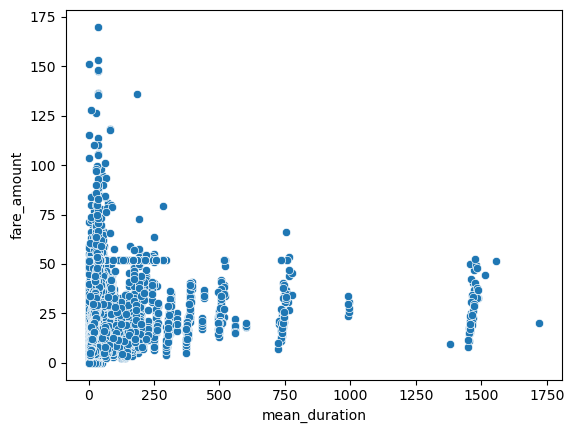

In [77]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(x = 'mean_duration', y = 'fare_amount', data = df);

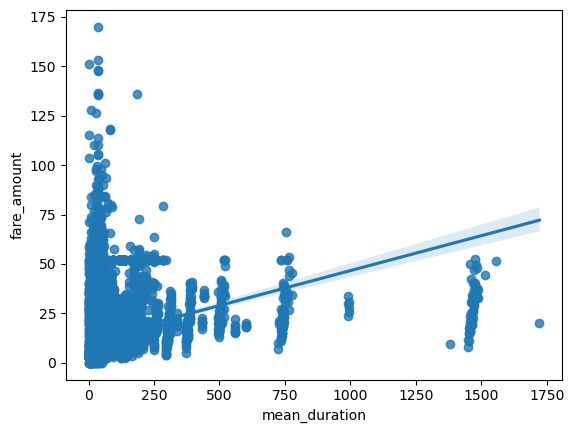

In [78]:
sns.regplot(x = 'mean_duration', y = 'fare_amount', data = df);

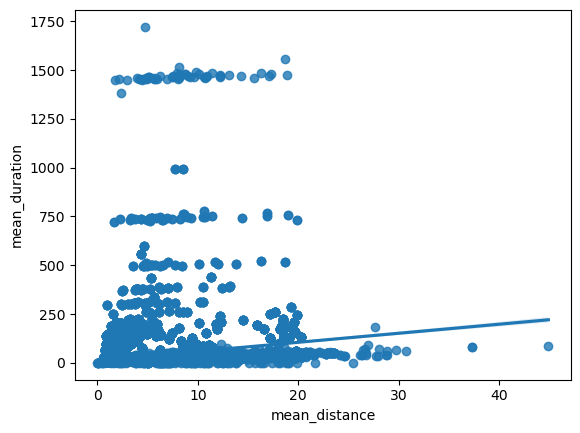

In [96]:
sns.regplot(x = 'mean_distance', y = 'mean_duration', data = df);

The `mean_distance` and `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [82]:
df.loc[df.fare_amount > 50, 'fare_amount'].value_counts().head(5)

52.0    1086
53.5      12
51.0      11
55.0      10
64.0       9
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [89]:
pd.set_option("display.max_columns", None)
df[df.fare_amount==52].head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
24,1,2017-01-16 04:36:41,2017-01-16 05:25:14,3,16.50,2,Y,164,132,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,0 days 00:48:33,48.55,48.55,48.550000,164 132,16.815833,35.706944,Monday,January,0
30,2,2017-01-21 07:30:38,2017-01-21 08:10:54,1,18.48,1,N,233,214,1,52.0,0.0,0.5,6.94,16.62,0.3,76.36,0 days 00:40:16,40.27,40.27,40.266667,233 214,18.480000,40.266667,Saturday,January,0
74,1,2017-01-15 05:59:17,2017-01-15 06:56:32,1,17.60,2,N,231,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0 days 00:57:15,57.25,57.25,57.250000,231 132,19.917500,41.825000,Sunday,January,0
268,2,2017-01-08 03:20:02,2017-01-08 04:00:35,1,17.35,2,N,132,229,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01,0 days 00:40:33,40.55,40.55,40.550000,132 229,17.664615,258.594872,Sunday,January,0
328,2,2017-01-03 07:43:10,2017-01-03 08:24:50,3,19.23,2,N,132,158,1,52.0,4.5,0.5,11.46,0.00,0.3,68.76,0 days 00:41:40,41.67,41.67,41.666667,132 158,19.921429,57.283333,Tuesday,January,1
352,2,2017-01-15 07:27:53,2017-01-15 08:09:45,2,23.73,2,N,132,87,1,52.0,0.0,0.5,10.56,0.00,0.3,63.36,0 days 00:41:52,41.87,41.87,41.866667,132 87,20.026154,45.933333,Sunday,January,0
363,1,2017-01-17 03:29:28,2017-01-17 04:38:01,3,16.70,2,N,162,132,1,52.0,0.0,0.5,11.65,5.54,0.3,69.99,0 days 01:08:33,68.55,68.55,68.550000,162 132,16.850000,44.459259,Tuesday,January,0
378,2,2017-01-08 06:10:09,2017-01-08 06:55:31,1,22.50,2,N,132,143,1,52.0,0.0,0.5,8.75,5.54,0.3,67.09,0 days 00:45:22,45.37,45.37,45.366667,132 143,20.610000,47.152381,Sunday,January,0
390,2,2017-01-20 03:39:09,2017-01-20 04:31:28,2,17.55,2,N,132,162,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,0 days 00:52:19,52.32,52.32,52.316667,132 162,17.467000,39.349444,Friday,January,0
427,2,2017-01-20 02:17:38,2017-01-20 03:00:21,1,19.25,2,N,132,262,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01,0 days 00:42:43,42.72,42.72,42.716667,132 262,19.565000,35.604762,Friday,January,0


We see that most of these records have RateCodeID of 2

In [87]:
df['RatecodeID'].value_counts()

1    48747
2     1074
3       82
5       72
4       25
Name: RatecodeID, dtype: int64

In [88]:
df.loc[df.fare_amount == 52.0, 'RatecodeID'].value_counts()

2    1073
1      12
5       1
Name: RatecodeID, dtype: int64

In [90]:
df.loc[df.fare_amount == 52.0, 'tolls_amount'].value_counts()

5.54     786
0.00     291
11.08      2
16.62      1
5.56       1
5.55       1
10.50      1
8.00       1
12.50      1
6.99       1
Name: tolls_amount, dtype: int64

**Question:** What do you notice about the first 30 trips?

Most of rides have RateCodeID = 2 ie JFK rate code and either the end or beginning Location ID is 132 in all cases with id 2.  

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors. However, there are many toll amounts of  5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way we know that those data points will always be correct.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

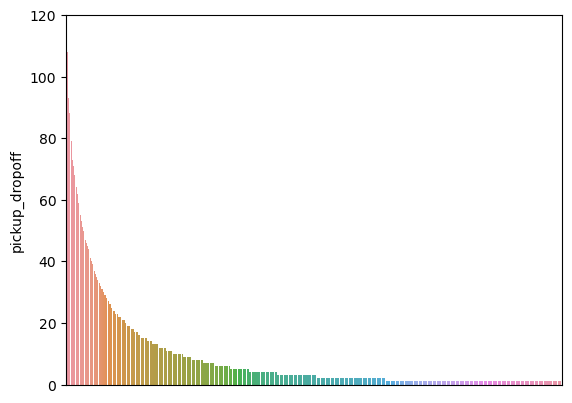

In [107]:
ax = sns.barplot(x=df.pickup_dropoff.value_counts().index, y=df.pickup_dropoff.value_counts())
ax.set_xticklabels([]);
ax.set_xticks([]);
ax.set_ybound(upper=120)

In [91]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,dur_mins,abs_mins,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,4.5,0.0,0.5,1.05,0.0,0.3,6.35,0 days 00:04:19,4.32,4.32,4.316667,186 170,1.037439,9.777033,Tuesday,January,0
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,0 days 00:05:31,5.52,5.52,5.516667,43 239,1.401429,7.226190,Monday,January,1
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,12.5,0.0,0.5,0.00,0.0,0.3,13.30,0 days 00:18:05,18.08,18.08,18.083333,237 100,2.124839,64.483871,Saturday,January,0
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,8.5,0.0,0.5,0.00,0.0,0.3,9.30,0 days 00:10:51,10.85,10.85,10.850000,211 45,1.006000,9.606667,Sunday,January,0
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,17.0,0.5,0.5,2.00,0.0,0.3,20.30,0 days 00:16:25,16.42,16.42,16.416667,148 181,4.450000,20.027778,Friday,January,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               50000 non-null  int64         
 1   tpep_pickup_datetime   50000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  50000 non-null  datetime64[ns]
 3   passenger_count        50000 non-null  int64         
 4   trip_distance          50000 non-null  float64       
 5   RatecodeID             50000 non-null  int64         
 6   store_and_fwd_flag     50000 non-null  object        
 7   PULocationID           50000 non-null  int64         
 8   DOLocationID           50000 non-null  int64         
 9   payment_type           50000 non-null  int64         
 10  fare_amount            50000 non-null  float64       
 11  extra                  50000 non-null  float64       
 12  mta_tax                50000 non-null  float64       
 13  t

In [135]:
red_df = df.iloc[:,np.r_[0, 3, 5, 6, 9, 10, 16, 22:25, 26]].reset_index(drop=True)
red_df.store_and_fwd_flag = (red_df.store_and_fwd_flag == 'Y').astype(int)
red_df.day = df.tpep_pickup_datetime.dt.weekday
# red_df.day.map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Satday': 5, 'Sunday': 6})
red_df.head()

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,total_amount,mean_distance,mean_duration,day,rush_hour
0,1,1,1,0,1,4.5,6.35,1.037439,9.777033,1,0
1,1,1,1,0,1,6.0,9.10,1.401429,7.226190,0,1
2,2,6,1,0,2,12.5,13.30,2.124839,64.483871,5,0
3,1,1,1,0,2,8.5,9.30,1.006000,9.606667,6,0
4,2,2,1,0,1,17.0,20.30,4.450000,20.027778,4,0


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

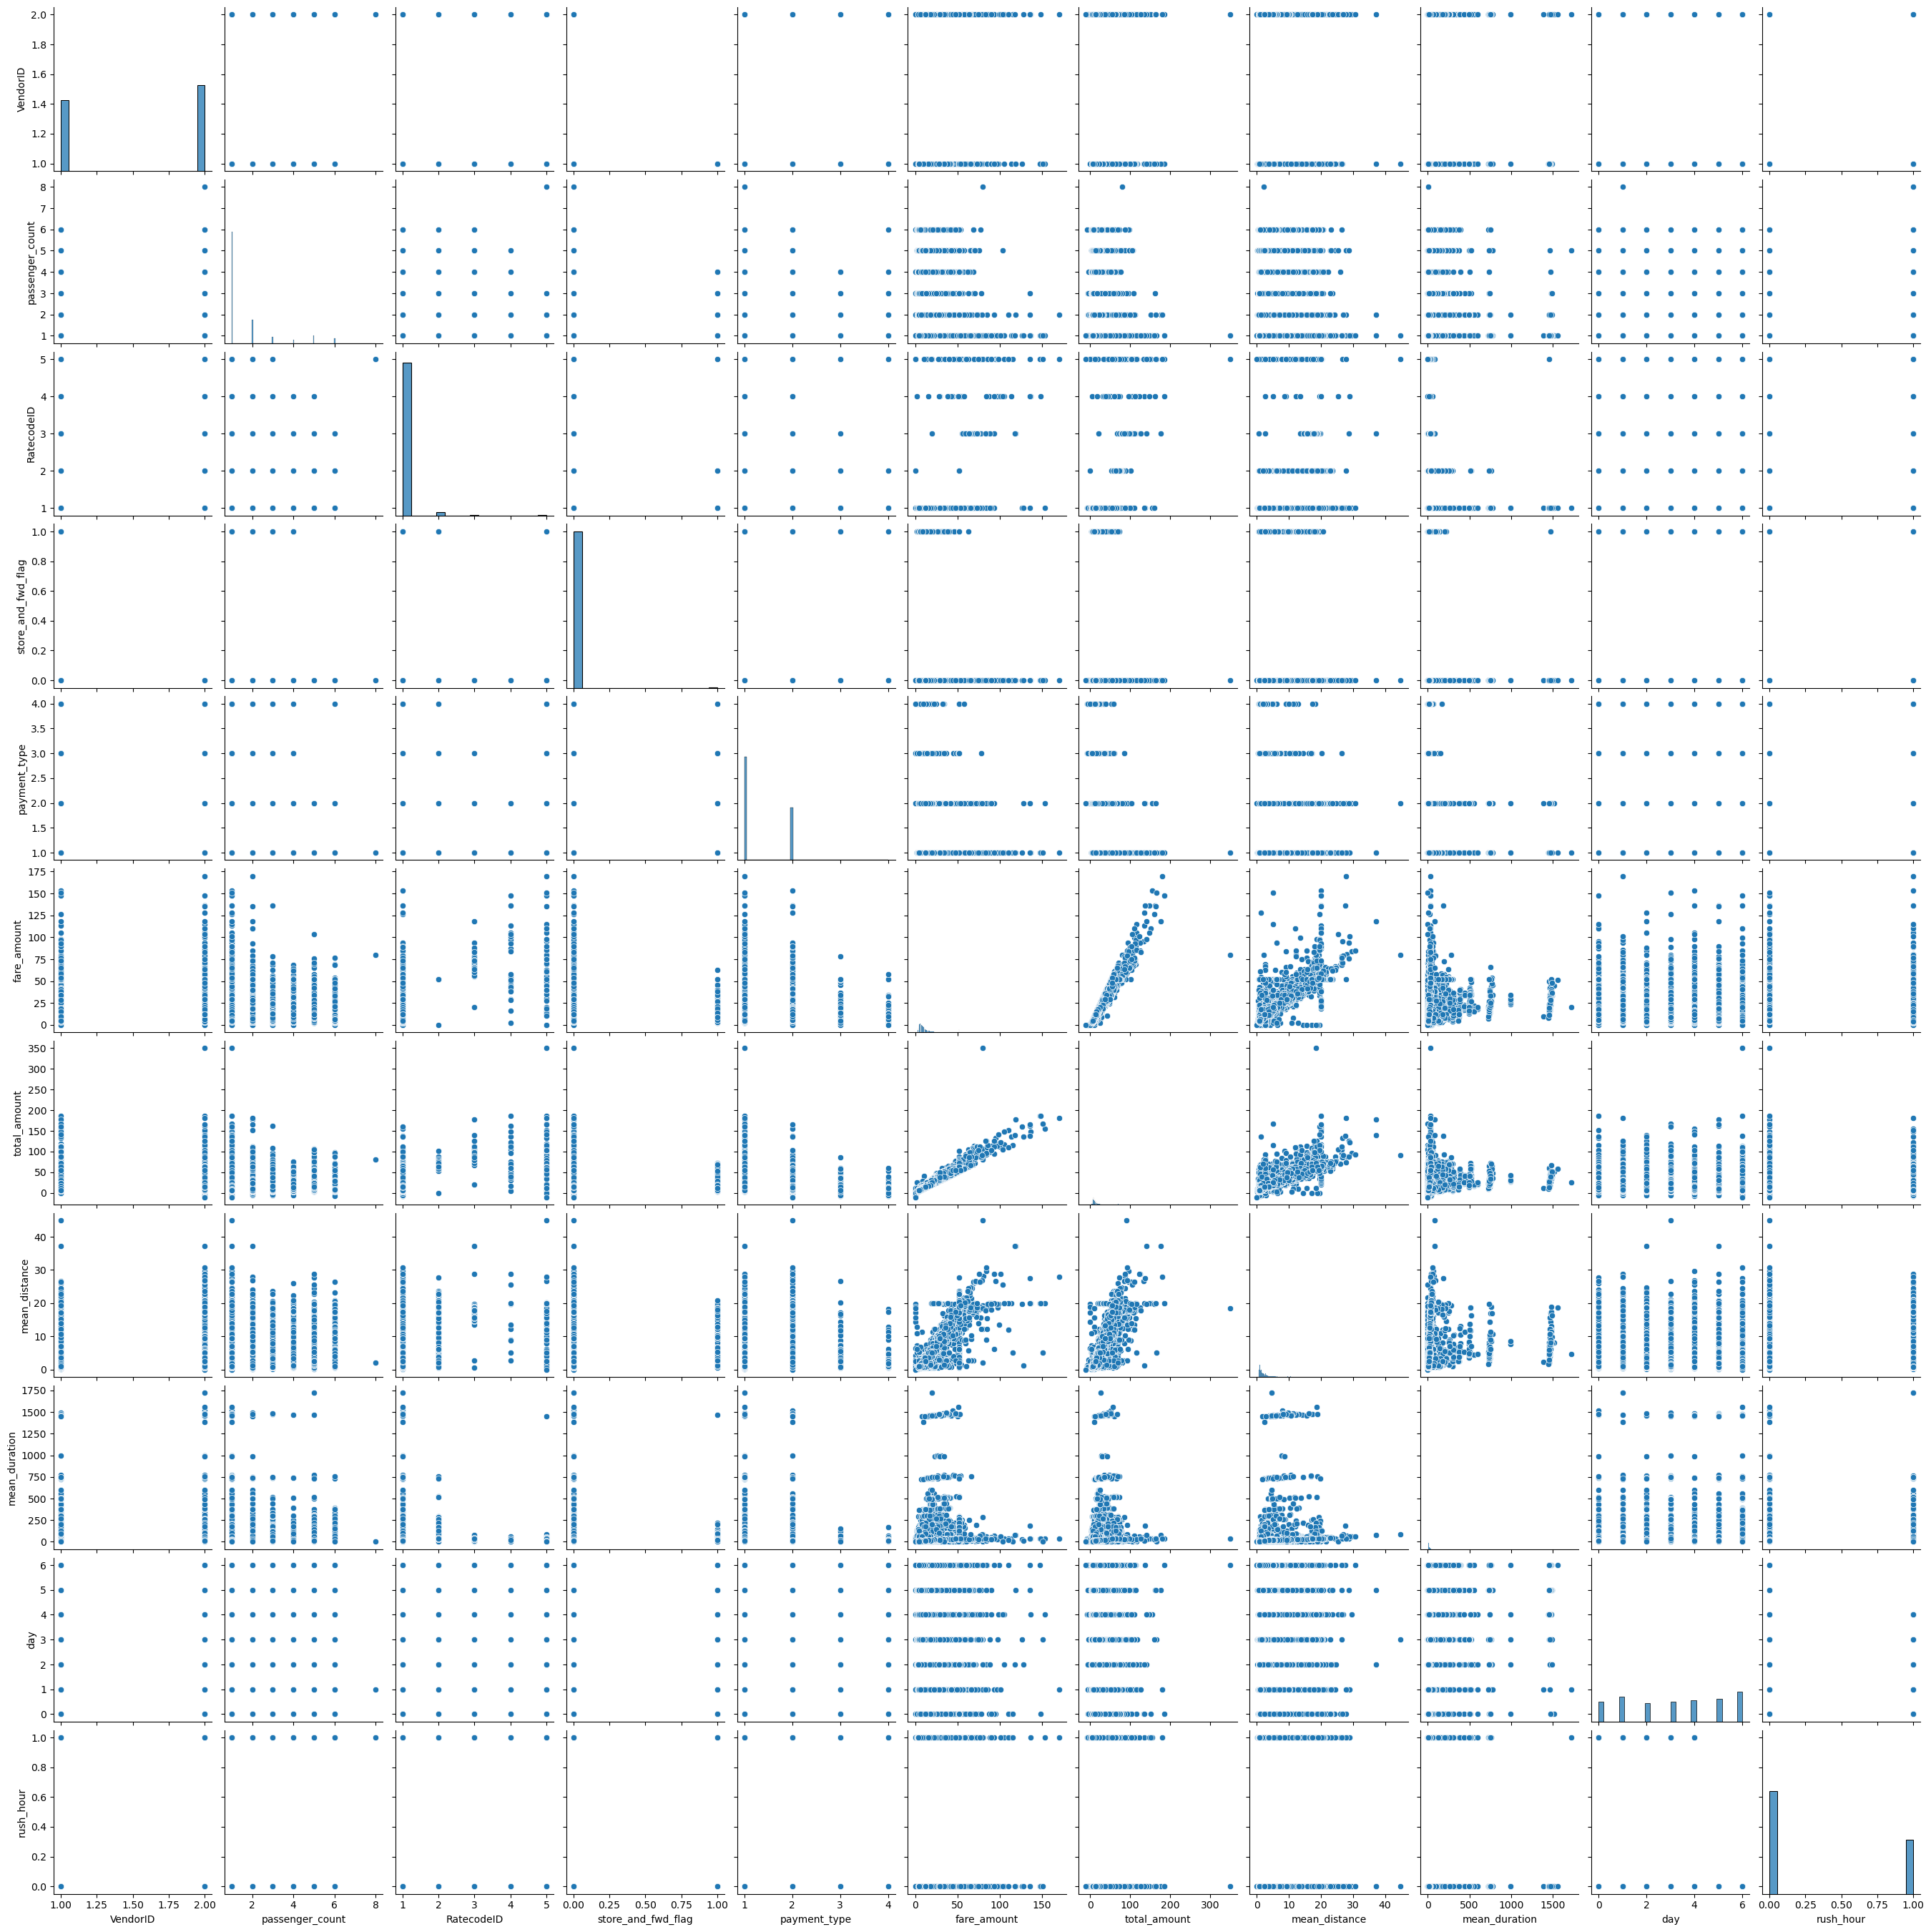

In [136]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(red_df)

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [137]:
# Correlation matrix to help determine most correlated variables
red_df.corr().sort_values('fare_amount')

,VendorID,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,total_amount,mean_distance,mean_duration,day,rush_hour
payment_type,-0.016067,0.012731,-0.006313,0.012052,1.000000,-0.056879,-0.144399,-0.047339,-0.020039,0.016026,-0.064144
rush_hour,0.003832,-0.024761,-0.026714,-0.002772,-0.064144,-0.022323,-0.011261,-0.026628,-0.040713,-0.413403,1.000000
day,0.002892,0.027653,-0.007963,-0.010853,0.016026,-0.013092,-0.019758,-0.005486,0.018325,1.000000,-0.413403
passenger_count,0.267170,1.000000,0.000725,-0.016563,0.012731,0.012019,0.009669,0.013179,0.008016,0.027653,-0.024761
VendorID,1.000000,0.267170,0.007246,-0.072225,-0.016067,0.018790,0.018745,0.020328,0.010621,0.002892,0.003832
store_and_fwd_flag,-0.072225,-0.016563,0.032867,1.000000,0.012052,0.048456,0.051062,0.054515,0.011029,-0.010853,-0.002772
mean_duration,0.010621,0.008016,0.071978,0.011029,-0.020039,0.231300,0.222641,0.241285,1.000000,0.018325,-0.040713
RatecodeID,0.007246,0.000725,1.000000,0.032867,-0.006313,0.564446,0.574866,0.522069,0.071978,-0.007963,-0.026714
mean_distance,0.020328,0.013179,0.522069,0.054515,-0.047339,0.929916,0.918326,1.000000,0.241285,-0.005486,-0.026628
total_amount,0.018745,0.009669,0.574866,0.051062,-0.144399,0.980749,1.000000,0.918326,0.222641,-0.019758,-0.011261


Visualize a correlation heatmap of the data.

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

**Ans.** Mean Distance, Mean Duration, RatecodeID. But Mean Distance and Mean duration are highly correlated themselves.

<AxesSubplot: >

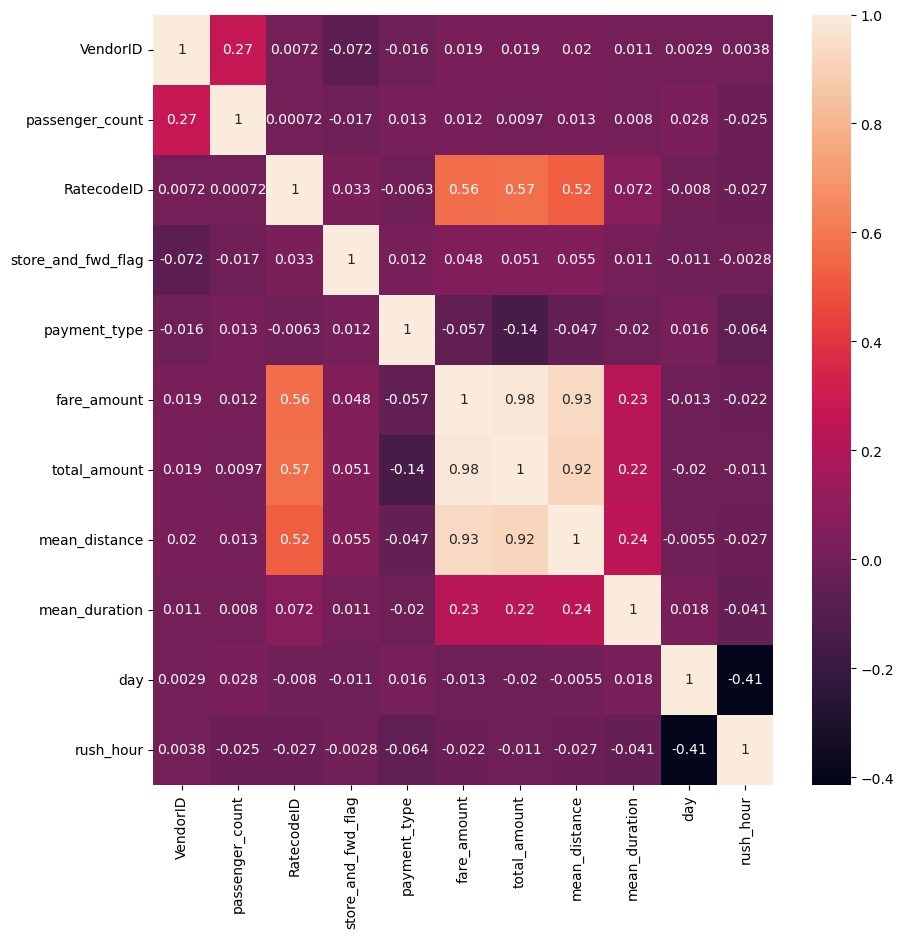

In [140]:
# Create correlation heatmap
fig = plt.figure(figsize = (10, 10))
sns.heatmap(red_df.corr(), annot = True)

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict fare_amount, which will be used as a predictor variable in machine learning models. Therefore, try modeling with all three variables even though they are correlated.

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [144]:
# Remove the target column from the features
X = red_df[['mean_distance', 'mean_duration', 'RatecodeID']]

# Set y variable
Y = red_df.fare_amount
Y_ = red_df.total_amount

### Task 8b. Pre-process data


Dummy encode categorical variables

In [147]:
X.RatecodeID.value_counts()

1    48747
2     1074
3       82
5       72
4       25
Name: RatecodeID, dtype: int64

In [149]:
# Convert VendorID to string
X.RatecodeID = X.RatecodeID.astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,mean_distance,mean_duration,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5
0,1.037439,9.777033,0,0,0,0
1,1.401429,7.226190,0,0,0,0
2,2.124839,64.483871,0,0,0,0
3,1.006000,9.606667,0,0,0,0
4,4.450000,20.027778,0,0,0,0


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

In [163]:
# Standardize the X variables
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-0.5140072 , -0.23144367, -0.14816045, -0.04053016, -0.02236627,
        -0.03797468],
       [-0.41190981, -0.26870257, -0.14816045, -0.04053016, -0.02236627,
        -0.03797468],
       [-0.20899662,  0.56763234, -0.14816045, -0.04053016, -0.02236627,
        -0.03797468],
       ...,
       [-0.54542179, -0.29010724, -0.14816045, -0.04053016, -0.02236627,
        -0.03797468],
       [-0.13891004, -0.22638256, -0.14816045, -0.04053016, -0.02236627,
        -0.03797468],
       [-0.110778  , -0.15731489, -0.14816045, -0.04053016, -0.02236627,
        -0.03797468]])

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [164]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=39)

Instantiate your model and fit it to the training data.

In [166]:
# Fit your model to the training data
model = LinearRegression().fit(X_train, Y_train)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [167]:
# Evaluate the model performance on the training data
Y_pred_train = model.predict(X_train)
print("R^2 Score = ", skm.r2_score(Y_train, Y_pred_train))
print("Explained_variance_score = ", skm.explained_variance_score(Y_train, Y_pred_train))
print("Mean_absolute_error = ", skm.mean_absolute_error(Y_train, Y_pred_train))
print("Mean_squared_error = ", skm.mean_squared_error(Y_train, Y_pred_train))
print("Root_mean_squared_error = ", np.sqrt(skm.mean_squared_error(Y_train, Y_pred_train)))

R^2 Score =  0.8759290581618344
Explained_variance_score =  0.8759290581618344
Mean_absolute_error =  2.1194579160066223
Mean_squared_error =  13.630308233022628
Root_mean_squared_error =  3.6919247328490634


### Test data

Calculate the same metrics on the test data.

In [169]:
# Evaluate the model performance on the testing data
Y_pred_test = model.predict(X_test)
print("R^2 Score = ", skm.r2_score(Y_test, Y_pred_test))
print("Explained_variance_score = ", skm.explained_variance_score(Y_test, Y_pred_test))
print("Mean_absolute_error = ", skm.mean_absolute_error(Y_test, Y_pred_test))
print("Mean_squared_error = ", skm.mean_squared_error(Y_test, Y_pred_test))
print("Root_mean_squared_error = ", np.sqrt(skm.mean_squared_error(Y_test, Y_pred_test)))

R^2 Score =  0.8802788172727096
Explained_variance_score =  0.8802951479837307
Mean_absolute_error =  2.076933871095691
Mean_squared_error =  12.951564171931807
Root_mean_squared_error =  3.5988281664913937


- The model performs similarly on both training and test datasets.
- The scores are high so the model can be cosidered successful
- The errors are on the lower side which is a good scenario.
- For the test data, an R2 of 0.869 means that 86.9% of the variance in the fare_amount variable is described by the model.

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

In [171]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': Y_train, 'predicted': Y_pred_train})
results['residual'] = results.actual - results.predicted
results

,actual,predicted,residual
43581,12.5,12.036838,0.463162
31547,6.5,8.229047,-1.729047
32271,28.5,29.436674,-0.936674
11273,16.5,13.568227,2.931773
7778,10.0,10.938893,-0.938893
...,...,...,...
43235,62.0,58.668201,3.331799
31302,6.0,8.553593,-2.553593
33856,5.5,6.243398,-0.743398
7209,16.0,11.104494,4.895506


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

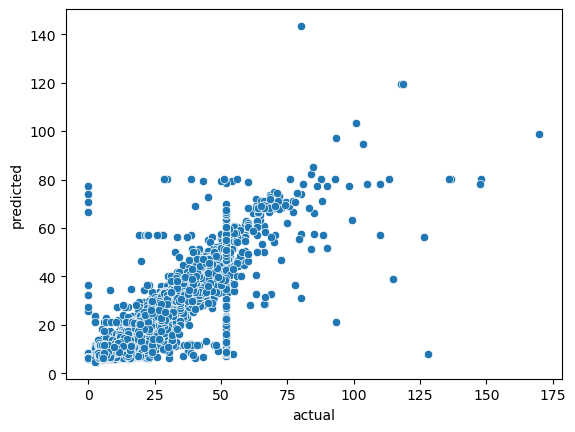

In [172]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x = 'actual', y = 'predicted', data = results);

Visualize the distribution of the `residuals` using a histogram.

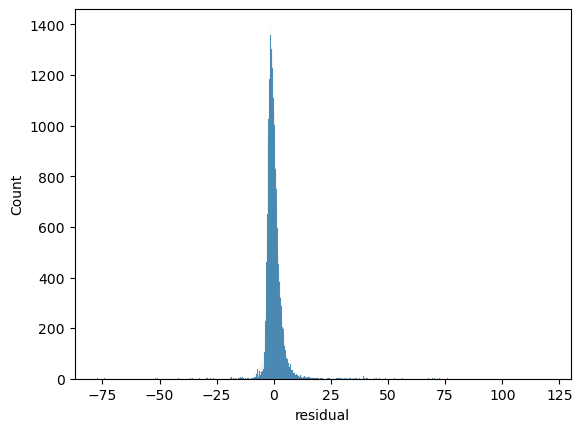

In [173]:
# Visualize the distribution of the `residuals`
sns.histplot(results.residual);

In [174]:
# Calculate residual mean
results.residual.mean()

1.8148682556784478e-15

Create a scatterplot of `residuals` over `predicted`.

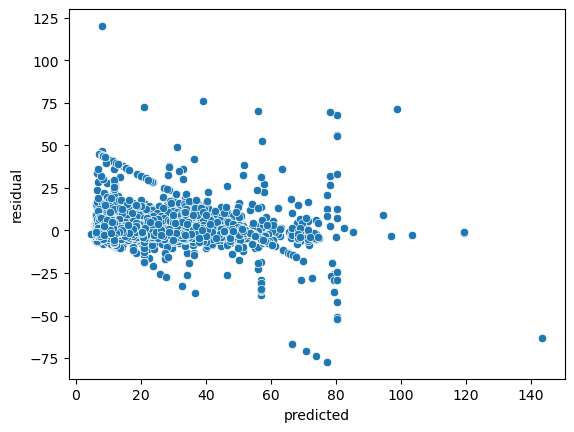

In [175]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x = 'predicted', y = 'residual', data = results);

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [176]:
# Output the model's coefficients
model.coef_

array([9.33527693, 0.12272245, 0.17740563, 0.69277038, 0.5203189 ,
       0.80287633])

In [177]:
X.columns

Index(['mean_distance', 'mean_duration', 'RatecodeID_2', 'RatecodeID_3',
       'RatecodeID_4', 'RatecodeID_5'],
      dtype='object')

We see that the fare amount is highly dependent on `mean_distance` and `mean_duration`. For every mile traveled, the `fare_amount` increases by a mean of $9.33. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



- Multiple linear regression is a powerful machine learning tool to estimate a dependent continous variable from several independent variables.
- Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
- Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions (or not, depending on your use case).

We can discuss meeting linear regression assumptions like the residuals were normal, rows were independent, relationships were linear, and residual vs predicted was random plot so homosedacity is also verified. Also we can present the MAE and RMSE scores obtained from the model.